In [14]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [15]:
def get_ps_tsm_dataframes_csv(file_pattern: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Get the dataframes for the PS and TSM data from the files that match the pattern.
    """
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)

    df_ps, df_tsm = split_dataframe(df)
    
    return df_ps, df_tsm

def split_dataframe(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_ps = df[df['type'] == 'ps'].reset_index(drop=True)
    df_tsm = df[df['type'] == 'tsm'].reset_index(drop=True)
    
    return df_ps, df_tsm

def get_dataframe_csv(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

def get_dataframe_csv_no_header(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file, header=None)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

### STOI

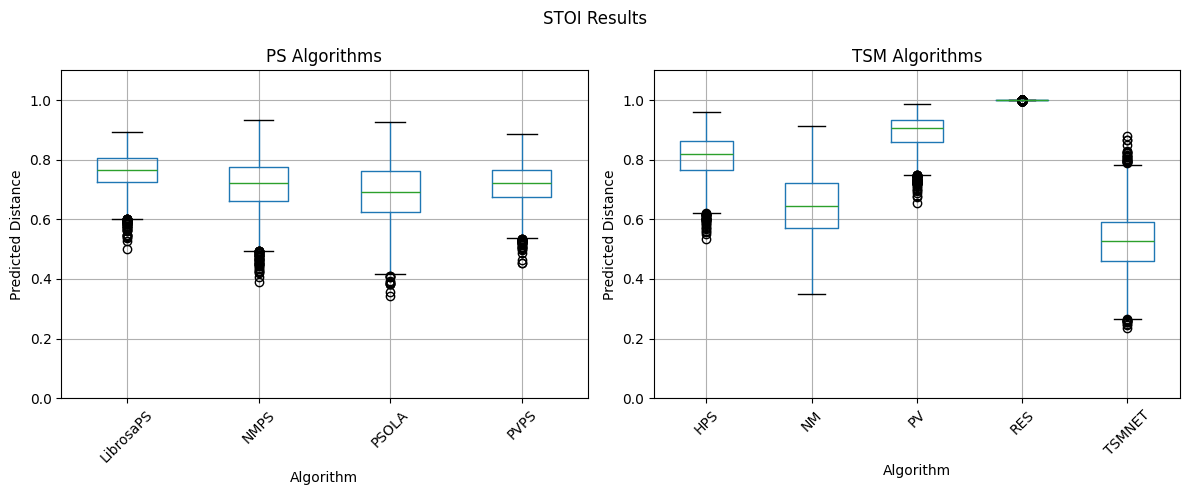

In [16]:
df_stoi_ps, df_stoi_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/stoi/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_stoi_ps.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Predicted Distance')
axes[0].set_ylim(0, 1.1)

# Boxplot for df_tsm
df_stoi_tsm.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Predicted Distance')
axes[1].set_ylim(0, 1.1)

# Set the main title
fig.suptitle("STOI Results")

plt.tight_layout()
plt.show()

### SISNR

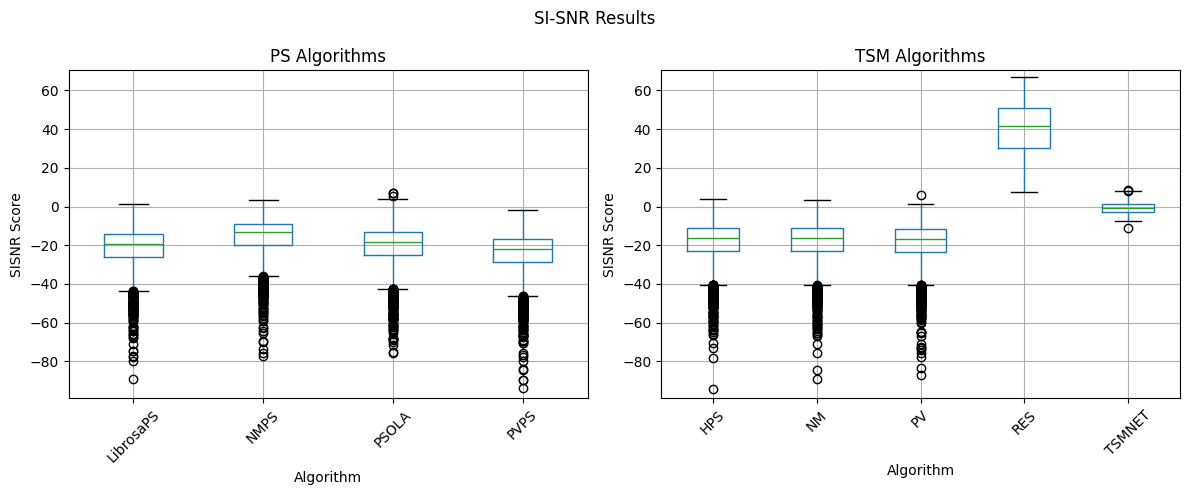

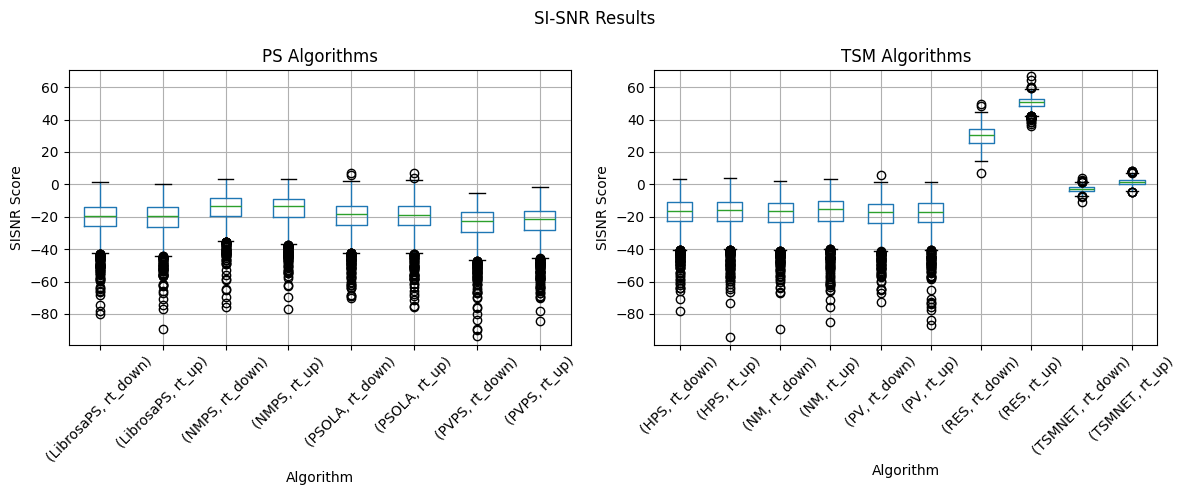

In [17]:
df_sisnr_ps, df_sisnr_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/sisnr/*.csv")

def plot_sisnr_results(df_ps: pd.DataFrame, df_tsm: pd.DataFrame, groupby = 'algo') -> None:
    """
    Plot the SISNR results for PS and TSM algorithms.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot for df_ps
    df_ps.boxplot(by=groupby, column='sisnr_score', rot=45, ax=axes[0])
    axes[0].set_title('PS Algorithms')
    axes[0].set_xlabel('Algorithm')
    axes[0].set_ylabel('SISNR Score')

    # Boxplot for df_tsm
    df_tsm.boxplot(by=groupby, column='sisnr_score', rot=45, ax=axes[1])
    axes[1].set_title('TSM Algorithms')
    axes[1].set_xlabel('Algorithm')
    axes[1].set_ylabel('SISNR Score')

    # Set the same y-axis range for both plots
    y_min = min(df_ps['sisnr_score'].min(), df_tsm['sisnr_score'].min())
    y_max = max(df_ps['sisnr_score'].max(), df_tsm['sisnr_score'].max())
    axes[0].set_ylim(y_min * 1.05, y_max * 1.05)
    axes[1].set_ylim(y_min * 1.05, y_max * 1.05)

    # Set the main title
    fig.suptitle("SI-SNR Results")

    plt.tight_layout()
    plt.show()

plot_sisnr_results(df_sisnr_ps, df_sisnr_tsm)
plot_sisnr_results(df_sisnr_ps, df_sisnr_tsm, groupby=["algo", "factor"])

### PESQ

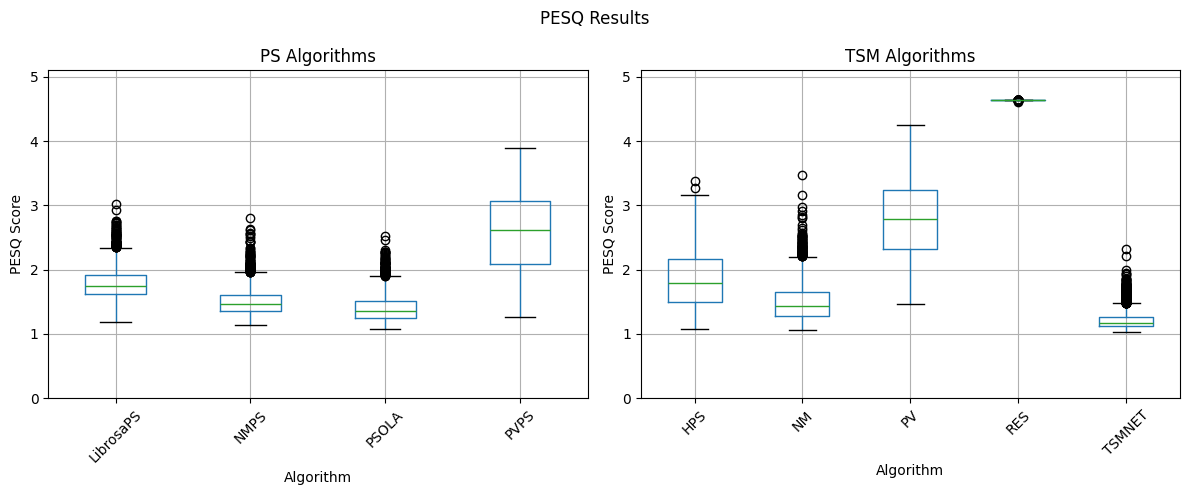

In [18]:
df_pesq_ps, df_pesq_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/pesq/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_pesq_ps.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('PESQ Score')
axes[0].set_ylim(0, 5.1)

# Boxplot for df_tsm
df_pesq_tsm.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('PESQ Score')
axes[1].set_ylim(0, 5.1)

# Set the main title
fig.suptitle("PESQ Results")

plt.tight_layout()
plt.show()

### NISQA

In [19]:
df_nisqa_tts = get_dataframe_csv("evaluation/objective/nisqa/tts/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_tts['type'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[3])
df_nisqa_tts['algo'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[4])
df_nisqa_tts['factor'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[5])

df_nisqa_tts_ps, df_nisqa_tts_tsm = split_dataframe(df_nisqa_tts)

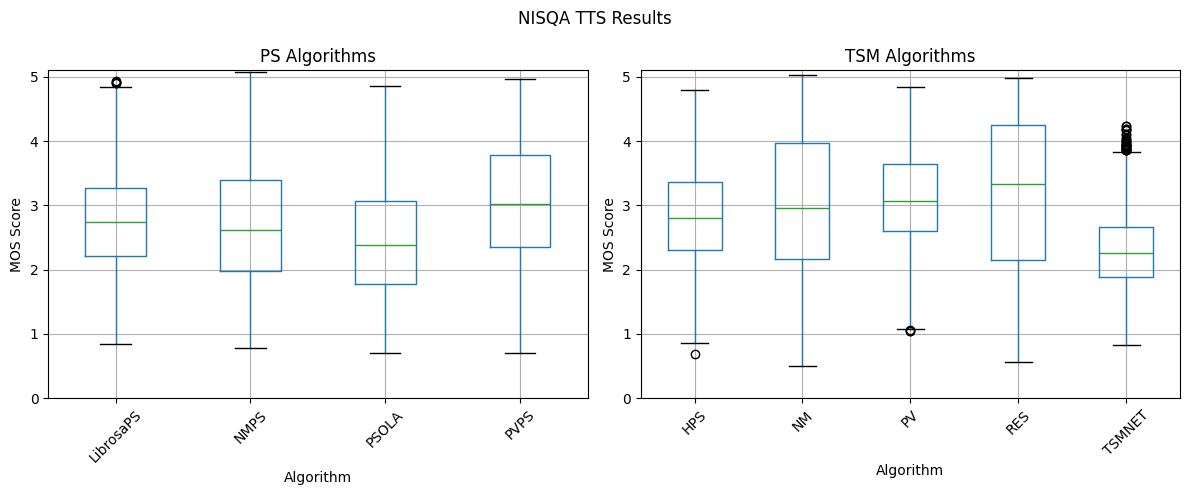

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_nisqa_tts_ps.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('MOS Score')
axes[0].set_ylim(0, 5.1)

# Boxplot for df_tsm
df_nisqa_tts_tsm.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('MOS Score')
axes[1].set_ylim(0, 5.1)

# Set the main title
fig.suptitle("NISQA TTS Results")

plt.tight_layout()
plt.show()

In [21]:
df_nisqa_std = get_dataframe_csv("evaluation/objective/nisqa/std/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_std['type'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[3])
df_nisqa_std['algo'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[4])
df_nisqa_std['factor'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[5])

df_nisqa_std_ps, df_nisqa_std_tsm = split_dataframe(df_nisqa_std)

/tmp/ipykernel_731518/2045258531.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
/tmp/ipykernel_731518/2045258531.py:12: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])


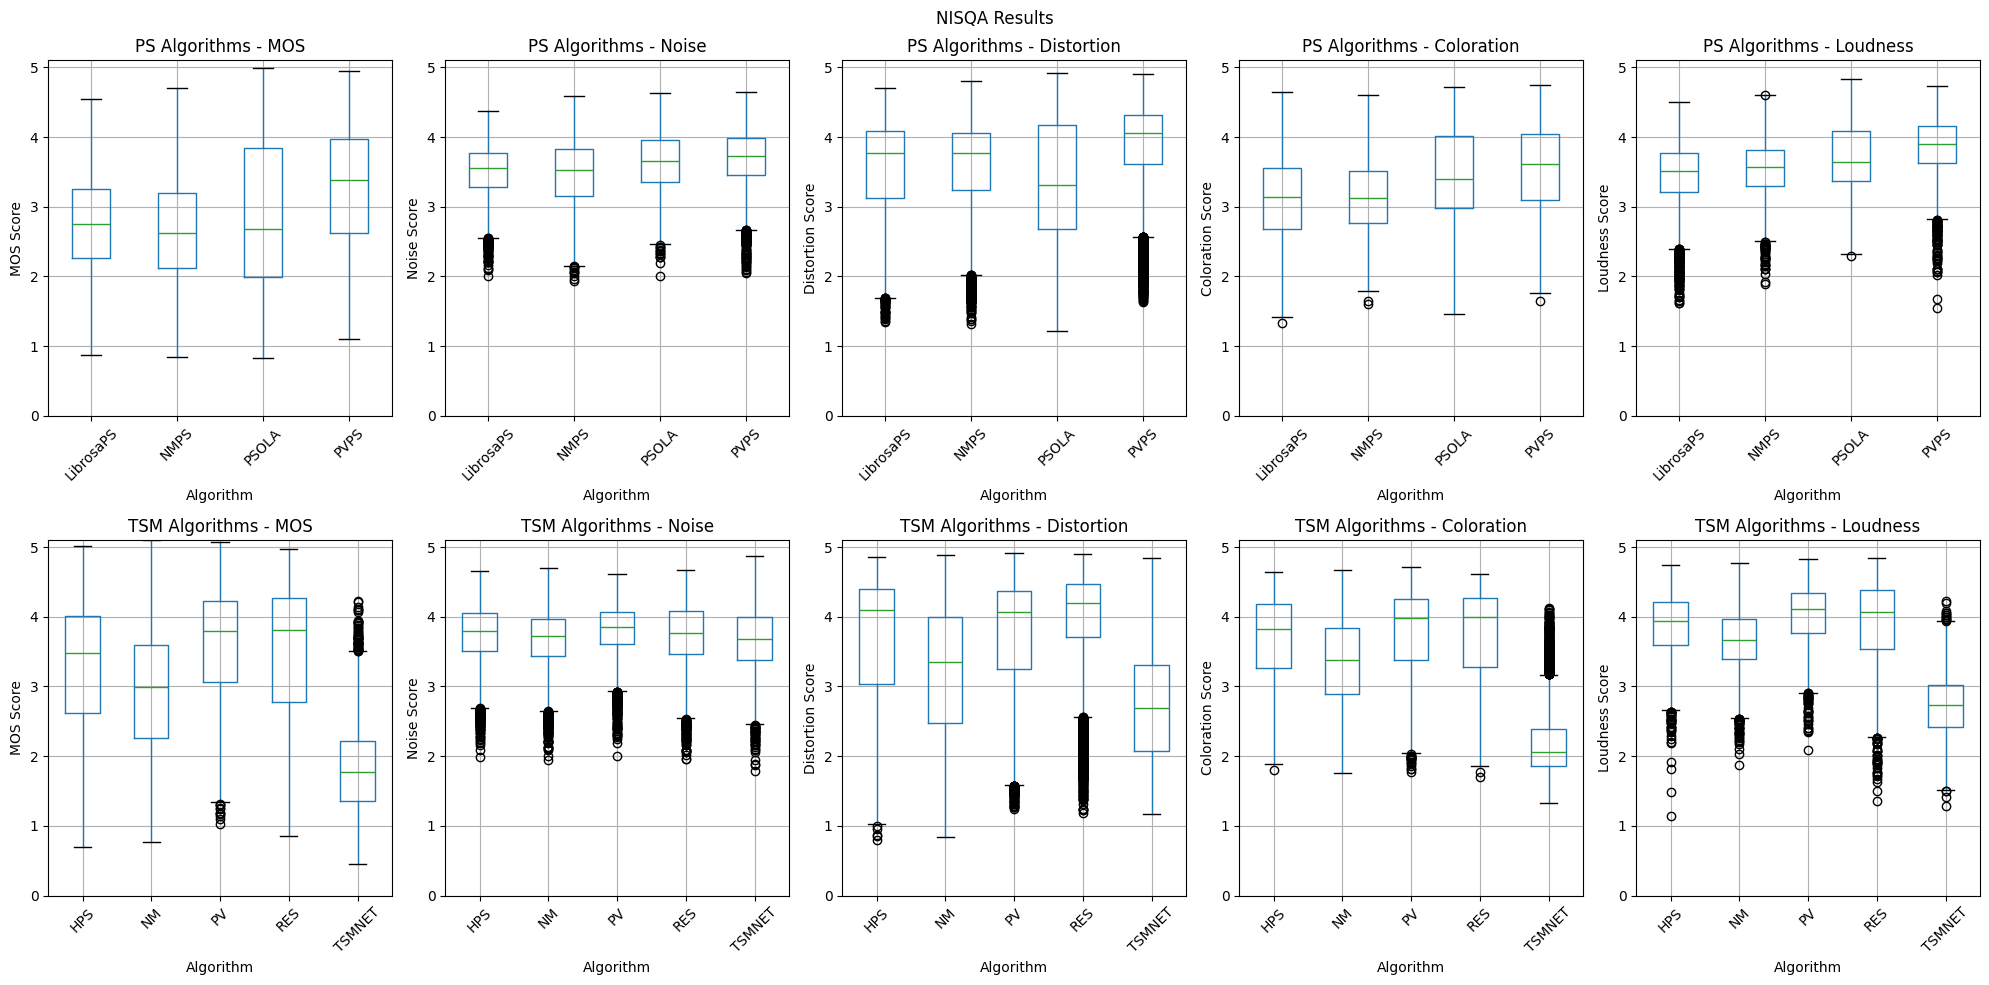

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Boxplots for df_ps
df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
for ax, metric in zip(axes[0], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(0., 5.1)

# Boxplots for df_tsm
df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])
for ax, metric in zip(axes[1], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(0., 5.1)

# Set the main title
fig.suptitle("NISQA Results")

plt.tight_layout()
plt.show()

### Audio Aesthetics

In [23]:
df_aa = pd.DataFrame({}) 
for file in glob.iglob("evaluation/objective/audio_aesthetics/*.jsonl"):
    df_tmp = pd.read_json(file, lines=True)
    df_aa = pd.concat([df_aa, df_tmp], ignore_index=True)
    
df_aa['type'] = df_aa['path'].apply(lambda x: x.split('/')[3])
df_aa['algo'] = df_aa['path'].apply(lambda x: x.split('/')[4])
df_aa['factor'] = df_aa['path'].apply(lambda x: x.split('/')[5])

df_aa_ps, df_aa_tsm = split_dataframe(df_aa)
df_aa_ps

,path,CE,CU,PC,PQ,type,algo,factor
0,data/output/wav48/ps/NMPS/7/p225/p225_315.wav,3.156401,2.626432,2.157503,3.333098,ps,NMPS,7
1,data/output/wav48/ps/NMPS/7/p225/p225_293.wav,3.418687,3.210753,2.324389,3.691452,ps,NMPS,7
2,data/output/wav48/ps/NMPS/7/p225/p225_018.wav,3.257092,3.316994,2.391879,3.559452,ps,NMPS,7
3,data/output/wav48/ps/NMPS/7/p225/p225_071.wav,3.606440,3.778450,1.902575,4.300262,ps,NMPS,7
4,data/output/wav48/ps/NMPS/7/p225/p225_324.wav,2.562227,2.506832,2.289993,3.239154,ps,NMPS,7
...,...,...,...,...,...,...,...,...
25411,data/output/wav48/ps/PSOLA/-12/p230/p230_366.wav,4.332418,4.929062,1.775202,4.991349,ps,PSOLA,-12
25412,data/output/wav48/ps/PSOLA/-12/p230/p230_263.wav,3.613687,3.304683,1.777799,3.950103,ps,PSOLA,-12
25413,data/output/wav48/ps/PSOLA/-12/p230/p230_139.wav,4.566390,4.930850,1.650690,5.306670,ps,PSOLA,-12
25414,data/output/wav48/ps/PSOLA/-12/p230/p230_027.wav,4.454708,4.781890,1.617449,4.957392,ps,PSOLA,-12


/tmp/ipykernel_731518/1558142822.py:14: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_ps.boxplot(by='algo', column=metrics, rot=45, ax=axes[0])
/tmp/ipykernel_731518/1558142822.py:22: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_tsm.boxplot(by='algo', column=metrics, rot=45, ax=axes[1])


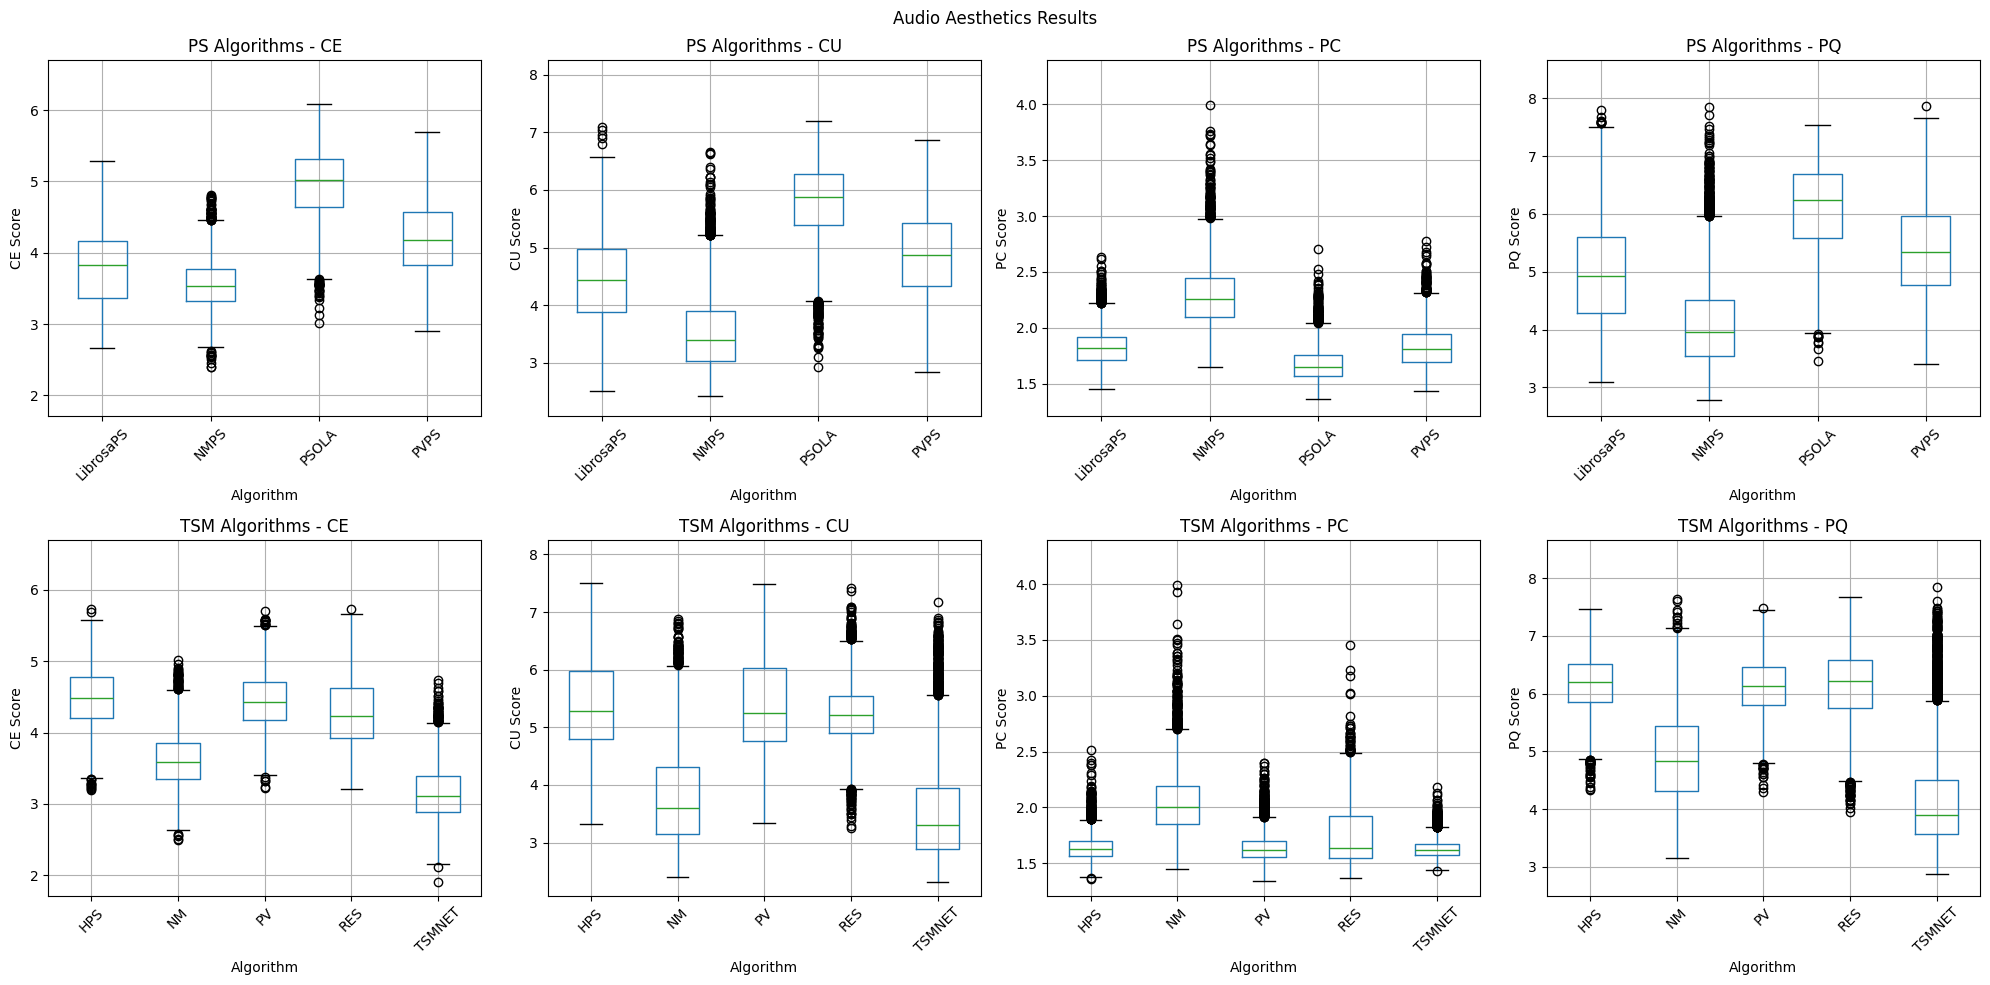

In [24]:
# Calculate global y-axis limits for each metric
metrics = ['CE', 'CU', 'PC', 'PQ']
y_lims = {
    metric: (
        min(df_aa_ps[metric].min(), df_aa_tsm[metric].min()) * 0.9,
        max(df_aa_ps[metric].max(), df_aa_tsm[metric].max()) * 1.1
    )
    for metric in metrics
}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Boxplots for df_ps
df_aa_ps.boxplot(by='algo', column=metrics, rot=45, ax=axes[0])
for ax, metric in zip(axes[0], metrics):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(y_lims[metric])

# Boxplots for df_tsm
df_aa_tsm.boxplot(by='algo', column=metrics, rot=45, ax=axes[1])
for ax, metric in zip(axes[1], metrics):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(y_lims[metric])

# Set the main title
fig.suptitle("Audio Aesthetics Results")

plt.tight_layout()
plt.show()

### VISQOL

In [25]:
df_visqol = get_dataframe_csv_no_header("evaluation/objective/visqol/*.csv")
df_visqol.columns = ['input_path', 'output_path', 'score']

df_visqol['type'] = df_visqol['output_path'].apply(lambda x: x.split('/')[4])
df_visqol['algo'] = df_visqol['output_path'].apply(lambda x: x.split('/')[5])
df_visqol['factor'] = df_visqol['output_path'].apply(lambda x: x.split('/')[6])

df_visqol_ps, df_visqol_tsm = split_dataframe(df_visqol)
df_visqol_ps

,input_path,output_path,score,type,algo,factor
0,/data/input/wav16/p225/p225_315.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_31...,2.434171,ps,PSOLA,rt_up
1,/data/input/wav16/p225/p225_293.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_29...,2.513300,ps,PSOLA,rt_up
2,/data/input/wav16/p225/p225_018.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_01...,2.435474,ps,PSOLA,rt_up
3,/data/input/wav16/p225/p225_071.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_07...,2.435171,ps,PSOLA,rt_up
4,/data/input/wav16/p225/p225_324.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_32...,2.435679,ps,PSOLA,rt_up
...,...,...,...,...,...,...
16939,/data/input/wav16/p230/p230_366.wav,/data/output/wav16/ps/PVPS/rt_down/p230/p230_3...,2.801210,ps,PVPS,rt_down
16940,/data/input/wav16/p230/p230_263.wav,/data/output/wav16/ps/PVPS/rt_down/p230/p230_2...,2.857115,ps,PVPS,rt_down
16941,/data/input/wav16/p230/p230_139.wav,/data/output/wav16/ps/PVPS/rt_down/p230/p230_1...,2.699150,ps,PVPS,rt_down
16942,/data/input/wav16/p230/p230_027.wav,/data/output/wav16/ps/PVPS/rt_down/p230/p230_0...,2.717705,ps,PVPS,rt_down


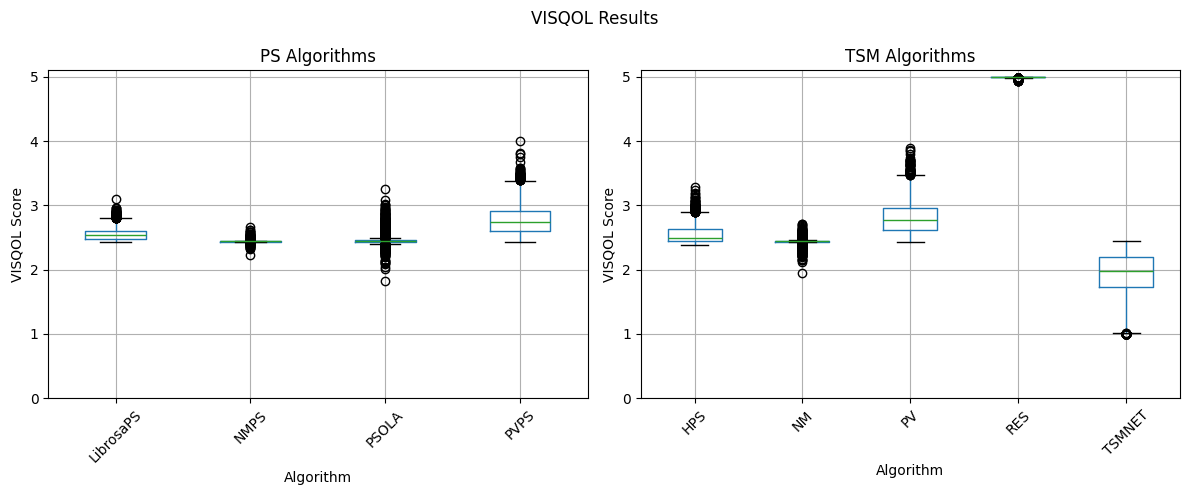

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_visqol_ps.boxplot(by='algo', column='score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('VISQOL Score')
axes[0].set_ylim(0., 5.1)

# Boxplot for df_tsm
df_visqol_tsm.boxplot(by='algo', column='score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('VISQOL Score')
axes[1].set_ylim(0., 5.1)

# Set the main title
fig.suptitle("VISQOL Results")

plt.tight_layout()
plt.show()